### ***1.Download the data set***

### ***2.Load the dataset***

In [51]:
from pathlib import Path as pth
import pandas as pd
import numpy as np

In [52]:
train = pd.read_csv(pth('/content/Churn_Modelling.csv'))

In [53]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### ***3.Perform visualizations***

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
train.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

AttributeError: ignored

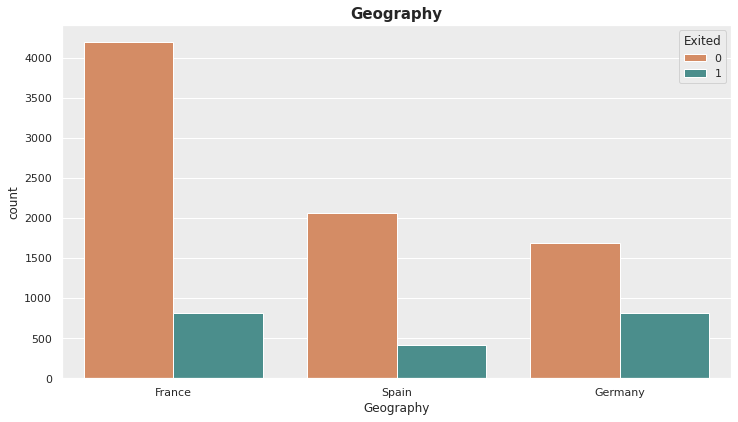

In [56]:
list_of_cat_features = train[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']]  
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_cat_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.countplot(x = list_of_cat_features[feature], hue = 'Exited', data = train, palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

### ***4.Perform descriptive statistucs on dataset***

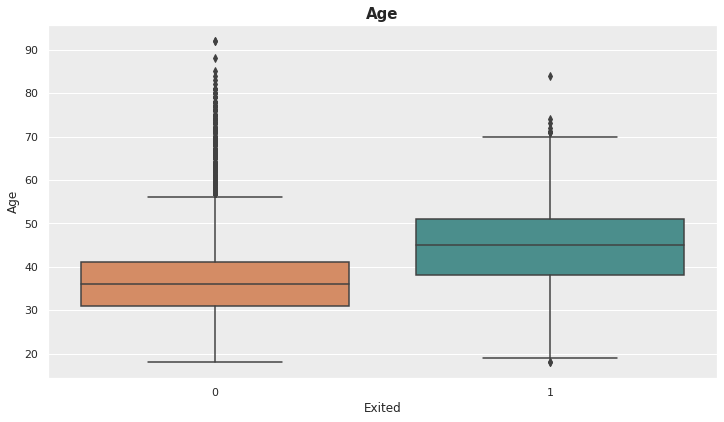

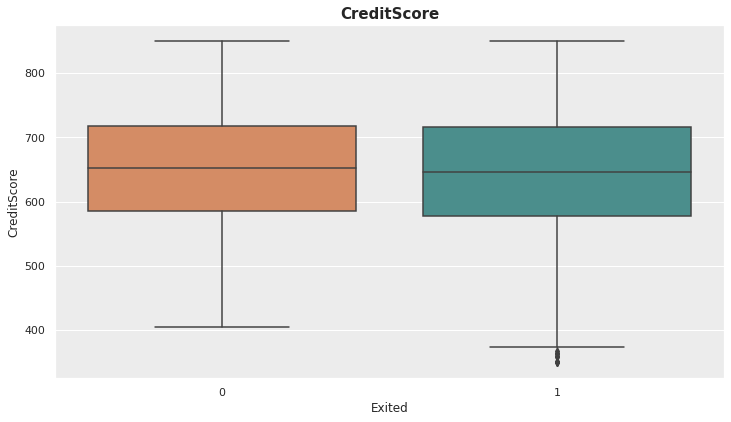

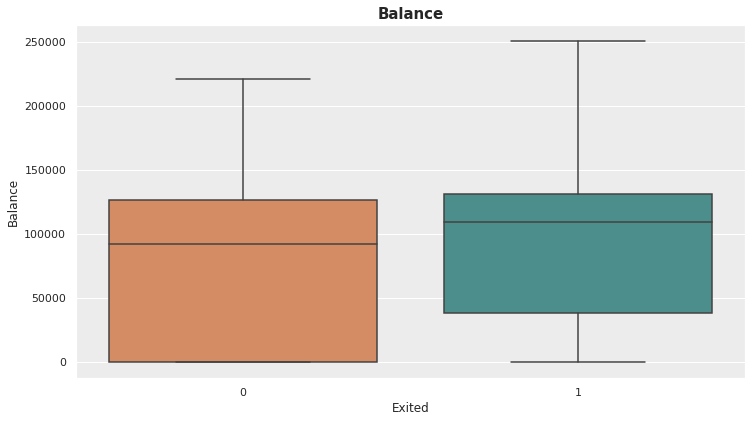

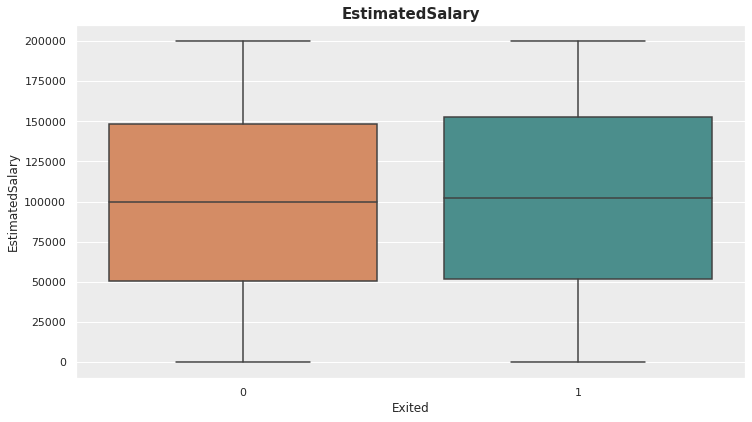

In [36]:
list_of_num_features = train[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']]  
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots

for feature in list_of_num_features:
    plt.figure(figsize=(12,6.5)) 
    plt.title(feature, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    ax = sns.boxplot(x = train['Exited'], y = list_of_num_features[feature], data = train, palette=palette_features)
    #add labels to each bar
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

### ***5.Handle the missing values***

In [40]:
#Checking for missing values
train.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### ***6.Finding and replacing outliers***

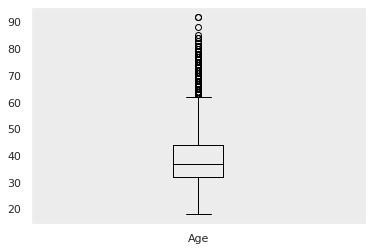

In [41]:
#identifying the outliers
train.boxplot(column=['Age'], grid=False, color='black')

### ***7.Check categorical column and perform***

In [42]:
numeric=train[['RowNumber','CustomerId','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
categorical=train[['Surname','Geography','Gender']]

In [43]:
categorical_encoded = pd.get_dummies(categorical, drop_first=True)
categorical_encoded.head()

,Surname_Abbie,Surname_Abbott,Surname_Abdullah,Surname_Abdulov,Surname_Abel,Surname_Abernathy,Surname_Abramov,Surname_Abramova,Surname_Abramovich,Surname_Abramowitz,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
train2 = pd.concat([numeric,categorical_encoded], axis=1)
train2.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0


### ***8.Split the data into independent and dependent***

In [45]:
x=train.iloc[:,1:7]
x1=train.iloc[:,10:]
x2=train.iloc[:,8]
x=pd.concat([x,x1,x2],axis=1)
y=pd.concat([train.iloc[:,7],train.iloc[:,9]],axis=1)

In [46]:
#dependent variables
y

,Tenure,NumOfProducts
0,2,1
1,1,1
2,8,3
3,1,2
4,2,1
...,...,...
9995,5,2
9996,10,1
9997,7,1
9998,3,2


In [47]:
#independent variables
x

,CustomerId,Surname,CreditScore,Geography,Gender,Age,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance
0,15634602,Hargrave,619,France,Female,42,1,1,101348.88,1,0.00
1,15647311,Hill,608,Spain,Female,41,0,1,112542.58,0,83807.86
2,15619304,Onio,502,France,Female,42,1,0,113931.57,1,159660.80
3,15701354,Boni,699,France,Female,39,0,0,93826.63,0,0.00
4,15737888,Mitchell,850,Spain,Female,43,1,1,79084.10,0,125510.82
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,1,0,96270.64,0,0.00
9996,15569892,Johnstone,516,France,Male,35,1,1,101699.77,0,57369.61
9997,15584532,Liu,709,France,Female,36,0,1,42085.58,1,0.00
9998,15682355,Sabbatini,772,Germany,Male,42,1,0,92888.52,1,75075.31


### ***9.Scale the independent variables***

In [48]:
train3=pd.DataFrame(x)
train3=train3.drop(['Surname','Geography','Gender'],axis=1)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train3)
scaled=ss.transform(df3)
scaled

NameError: ignored

### ***10.Split the data into training and testing*** 

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=0)
print('X_train size: {},X_test size: {}'.format(x_train.shape,x_test.shape))

X_train size: (8000, 11),X_test size: (2000, 11)


In [50]:
print('Y_train size: {},Y_test size: {}'.format(y_train.shape,y_test.shape))

Y_train size: (8000, 2),Y_test size: (2000, 2)
